Simple Random Forest implementation for the kaggle's competition "Digit recognizer": https://www.kaggle.com/c/digit-recognizer/

<b> Score: 0.95686 </b>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
from sklearn.ensemble import RandomForestClassifier

%matplotlib inline

In [3]:
ls

Digit_recognition.ipynb  test.csv  train.csv


In [7]:
test = pd.read_csv("test.csv", sep=",")
train = pd.read_csv("train.csv", sep=",")

In [13]:
# The first column, called "label", is the digit that was drawn by the user.
# dataset on which training the label

train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [14]:
#data in which 
test.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [52]:
test[test.index==0]

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


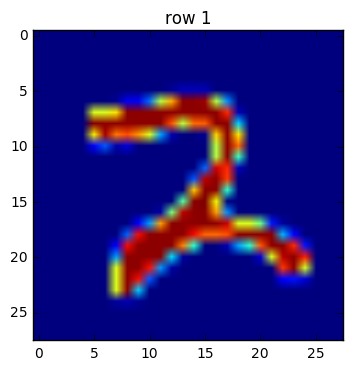

In [65]:
picture = np.array(test[test.index==27000]).reshape((28, 28))
img = Image.fromarray(picture.astype('uint8'))
plt.title("row 1")
plt.imshow(picture)

In [20]:
#pixels

In [21]:
decision_rf = RandomForestClassifier(n_estimators=100,
                            min_samples_leaf=5,
                            max_features='auto',
                            oob_score=True,
                            random_state=42,
                            n_jobs=-1
                            )


fitting_rf = decision_rf.fit(pixels.values, target.values)


In [28]:
decision_rf.score(pixels.values, target.values)

0.99102380952380953

In [26]:
prediction_rf = decision_rf.predict(test[:].values)


In [38]:
len(prediction_rf)

28000

In [34]:
submission = pd.DataFrame({'ImageId':range(1,28001), 'Label':prediction_rf})

In [35]:
submission.to_csv("solution_digit_recogn_rf.csv", index=False)